In [1]:
# Add Matplotlib inline magic command.
%matplotlib inline

In [2]:
#Import dependencies.
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
#Files to load.
ride_data_to_load=os.path.join("Resources","ride_data.csv")

city_data_to_load=os.path.join("Resources","city_data.csv")

In [4]:
#Read city data.
city_data_df=pd.read_csv(city_data_to_load)

#Display city data dataframe.
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
#Read ride data.
ride_data_df=pd.read_csv(ride_data_to_load)

#Display ride dataframe.
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [6]:
# Merge dataset.
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left", on=['city','city'])

#Display the merged dataframe.
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [7]:
#Get city types.
city_types=pyber_data_df['type'].unique()

#Display city types.
city_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get total rides by city type.
total_rides=pyber_data_df.groupby(['type']).count()['ride_id']

#Display total rides by city type.
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [9]:
#Get total drivers by city type.
total_drivers=city_data_df.groupby(['type']).sum()['driver_count']

#Display total drivers by city type.
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [10]:
#Get total fares by city type.
total_fares=pyber_data_df.groupby(['type']).sum()['fare']

#Display total fares by city type.
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [11]:
# Calculate average fare per ride.
avg_fare_ride=total_fares/total_rides

#Display average fare per ride.
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [12]:
# Calculate average fare per driver.
avg_fare_driver=total_fares/total_drivers

#Display average fare per driver.
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [13]:
#Create a Summary Data Frame.
pyber_summary_df=pd.DataFrame({ 'Total Rides':total_rides,'Total Drivers':total_drivers,
           'Total Fares':total_fares,'Average Fare per Ride':avg_fare_ride,'Average Fare per Driver':avg_fare_driver})

#Display the Data Frame.
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [14]:
# Format the dataframe.
pyber_summary_df["Total Fares"]=pyber_summary_df["Total Fares"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Ride"]=pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

#Delete index name.
pyber_summary_df.index.name=None

#Display the dataframe.
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


In [15]:
#Rename the columns.
pyber_data_df=pyber_data_df.rename(columns={'city':'City', 'date':'Date',
                              'fare':'Fare', 'ride_id': 'Ride Id',
                              'driver_count': 'No. Drivers', 'type':'City Type'})

#Set index to date column.
pyber_data_df=pyber_data_df.set_index('Date')

#Display modified dataframe.
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
1/14/2019 10:14,Lake Jonathanshire,13.83,5.739410e+12,5,Urban
3/4/2019 18:24,South Michelleport,30.24,2.343910e+12,72,Urban
2/24/2019 4:29,Port Samanthamouth,33.44,2.005070e+12,57,Urban
2/10/2019 23:22,Rodneyfort,23.44,5.149250e+12,34,Urban
3/6/2019 4:28,South Jack,34.58,3.908450e+12,46,Urban


In [16]:
#Create a copy of the pyberdf and add city type and fare column to it.
fare_data_df = pyber_data_df[["City Type","Fare"]].copy()

#Display fare per city type dataframe.
fare_data_df

,City Type,Fare
Date,,
1/14/2019 10:14,Urban,13.83
3/4/2019 18:24,Urban,30.24
2/24/2019 4:29,Urban,33.44
2/10/2019 23:22,Urban,23.44
3/6/2019 4:28,Urban,34.58
...,...,...
4/29/2019 17:04,Rural,13.38
1/30/2019 0:05,Rural,20.76
2/10/2019 21:03,Rural,11.11


In [17]:
#Set index to datetime.
fare_data_df.index=pd.to_datetime(fare_data_df.index)

#Chcek.
fare_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [18]:
#Calculate the sum of fares by date and city type.
sum_fares_df=pd.DataFrame(fare_data_df.groupby([fare_data_df.index,'City Type']).sum()["Fare"])

#Display the new dataframe.
sum_fares_df.head()

,,Fare
Date,City Type,
2019-01-01 00:08:00,Urban,37.91
2019-01-01 00:46:00,Suburban,47.74
2019-01-01 02:07:00,Suburban,24.07
2019-01-01 03:46:00,Urban,7.57
2019-01-01 05:23:00,Urban,10.75


In [19]:
# Reset index.
sum_fares_df.reset_index()

,Date,City Type,Fare
0,2019-01-01 00:08:00,Urban,37.91
1,2019-01-01 00:46:00,Suburban,47.74
2,2019-01-01 02:07:00,Suburban,24.07
3,2019-01-01 03:46:00,Urban,7.57
4,2019-01-01 05:23:00,Urban,10.75
...,...,...,...
2359,2019-05-08 04:20:00,Urban,21.99
2360,2019-05-08 04:39:00,Urban,18.45
2361,2019-05-08 07:29:00,Urban,18.55
2362,2019-05-08 11:38:00,Urban,19.77


In [20]:
# Create Pivot Table.
pivot_table_df=sum_fares_df.pivot_table(index='Date', columns='City Type', values='Fare')

#Display.
pivot_table_df.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [21]:
#Create a new datafram for the selected dates.
date_selection_df= pivot_table_df.loc['2019-01-01':'2019-04-28']

#Display the date selection dataframe.
date_selection_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [22]:
#Create a new dataframe and sort the data in weekly bins.
fares_week_df=date_selection_df.resample('W').sum()

#Display.
fares_week_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


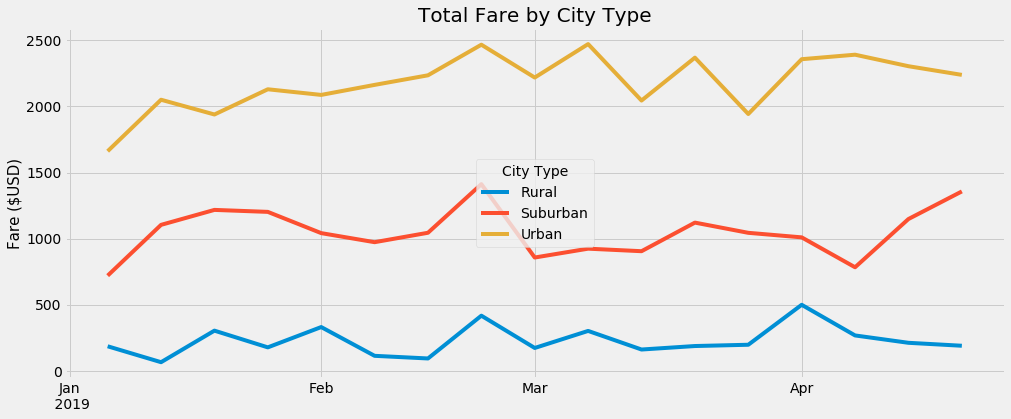

In [24]:
#Plot style.
plt.style.use('fivethirtyeight')

#Plot and fig size.
fig,ax=plt.subplots(figsize=(15,6))

#plotting fares for Rural, Suburban and Urban cities.
ax.plot(fares_week_df["Rural"],label="Rural")
ax.plot(fares_week_df["Suburban"],label="Suburban")
ax.plot(fares_week_df["Urban"],label="Urban")

#Formatting and labeling.
ax.set_title('Total Fare by City Type', size=20)
ax.set_ylabel('Fare ($USD)', size= 15)
ax.legend(loc="center", title="City Type")

# Setting xticks and labels.
plt.xticks([737060, 737093, 737121, 737156],['Jan\n 2019', 'Feb', 'Mar', 'Apr'])

# Save Figure.
plt.savefig("analysis/Fig8.png")

#Display plot.
plt.show()